# Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import math

## Bài 1

In [2]:
with open('/home/vitquay1708/Study_Space/ml/week_3/data/fuel.txt') as f:
  lines = f.readlines()

X = []
y = []

lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(',')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  fuel = 1000 * splitted[1] / splitted[5]
  dlic = 1000 *splitted[0] / splitted[5]
  log_miles = np.log2(splitted[4])

  y.append([fuel])
  X.append([splitted[-1], dlic, splitted[2], log_miles])


In [3]:
x_train = np.asarray(X[:40])
y_train = np.asarray(y[:40])
x_test = np.asarray(X[40:])
y_test = np.asarray(y[40:])

In [4]:
def qr_decomposition(matrix_A):
  rows = matrix_A.shape[0]
  cols = matrix_A.shape[1]

  Q = np.identity(rows) #Ma trận đơn vị 

  R = np.copy(matrix_A)

  for i in range(cols):
    x = matrix_A[i:, i]
    k = x.shape[0]

    ro = -np.sign(x[0]) * np.linalg.norm(x)

    e = np.zeros(k)
    e[0] = 1
    v = (1 / (x[0] - ro)) * (x - (ro * e))
    for j in range(cols):
      R[i:, j] = R[i: , j] - (2 / (v@v)) * ((np.outer(v, v)) @ R[i:, j])
    for j in range(rows):
      Q[i:, j] = Q[i: , j] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[i:, j])
  
  return Q.transpose(), R


In [5]:
def linear_regression(x, y):
  x_0 = np.ones((x.shape[0], 1))
  x_bars = np.concatenate((x_0, x), axis = 1)

  Q, R = qr_decomposition(x_bars)
  R_inverse = np.linalg.pinv(R)
  A = np.dot(R_inverse, Q.T)

  return np.dot(A, y)

In [6]:
theta = linear_regression(x_train, y_train)
res = list(zip(line, theta[0]))
x_0 = np.ones((x_test.shape[0], 1))
x_bars = np.concatenate((x_0, x_test), axis = 1)

print(theta.shape)
print(x_bars.shape)
y_pred = x_bars @ theta
print(y_pred)
print(y_test)

(5, 1)
(11, 5)
[[665.14218504]
 [656.43791345]
 [670.83287415]
 [611.81766756]
 [648.44425933]
 [819.87578485]
 [620.01346226]
 [562.29436162]
 [626.32478408]
 [603.6711268 ]
 [859.02744867]]
[[711.73305769]
 [697.05277706]
 [638.23106095]
 [681.10013659]
 [591.49994589]
 [691.02271186]
 [681.03112144]
 [576.06974956]
 [562.4109333 ]
 [581.79371695]
 [842.79175243]]


In [7]:
mean_y_test = np.full((x_bars.shape[0], 1), np.mean(y_test))
mse = np.mean((y_pred - y_test) ** 2)
mae = np.mean((np.abs(y_pred - y_test)))
tss = np.mean((y_test - mean_y_test) ** 2)
r_square = 1 - (mse / tss)
print(mse, mae, tss, r_square)

3479.00907375183 50.15521899123942 6105.430577462647 0.4301779326434223


# Ví dụ B.3: Bài tập tự thực hành 1

In [8]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_3/data/SAT_GPA.csv')

y = df['GPA']
x = df['SAT']
r, p_value = pearsonr(x, y)
print(r)
print(p_value)
x=df[['SAT']] #convert to 2-D 

0.6371843648401909
7.199518436564216e-11


Linear Regression

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
w0 = np.ones((x_train.shape[0], 1))

x_bars_train = np.concatenate((w0, x_train), axis = 1)
XTX = np.dot(x_bars_train.T, x_bars_train)
XTy = np.dot(x_bars_train.T, y_train)
theta = np.linalg.pinv(XTX) @ XTy 


Plot

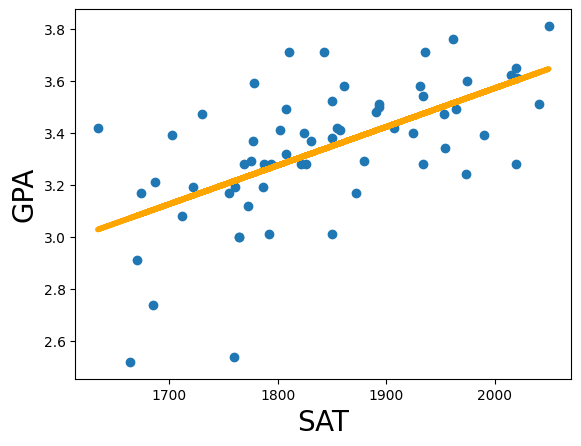

In [11]:
plt.scatter(x_train, y_train)
yhat = theta[1] * x_train + theta[0]

fig = plt.plot(x_train, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Validation

In [12]:
x_bars_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
y_pred = x_bars_test @ theta
y_test = np.array(y_test)
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
y_mean = np.full((y_pred.shape[0], 1), np.mean(y_test))
r_square = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_mean) ** 2))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')

MSE: 0.045871757821705314
MAE: 0.1554883807654074
R^2: 0.9754842565353008


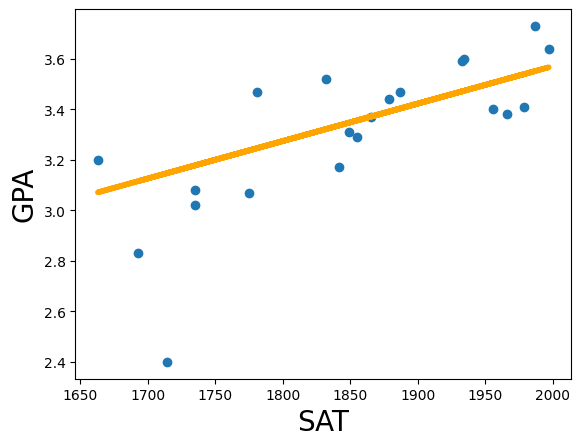

In [13]:
plt.scatter(x_test, y_test)
yhat = theta[1] * x_test + theta[0]

fig = plt.plot(x_test, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Ví dụ B.4 (Bài tập 2)

In [14]:
with open('/home/vitquay1708/Study_Space/ml/week_3/data/vidu4_lin_reg.txt') as f:
  lines = f.readlines()

X = []
y = []

lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(' ')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  y.append(splitted[5])
  X.append(splitted[:5])

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(100, 5)
(100,)


#### a) Xác định các hệ số với 100 dữ liệu trên

In [15]:
theta_100 = linear_regression(X, y)
print(theta_100)


[-0.10802908  0.00994694 -0.00020655  0.00218137  0.0076701   0.03847025]


In [16]:
x_train = X[:80]
x_test = X[80:]
y_train = y[:80]
y_test = y[80:]

theta = linear_regression(x_train, y_train)
w0 = np.ones((x_test.shape[0], 1))
x_bars = np.concatenate((w0, x_test), axis = 1)
y_pred = x_bars @ theta
mean_y_pred = np.mean(y_pred)
var_y_pred = np.var(y_pred)
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
r_square = 1 - ((np.sum((y_test - y_pred) ** 2))/np.sum((y_test - mean_y_pred) ** 2))

print(f'Mean: {mean_y_pred}')
print(f'Variance: {var_y_pred}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')


Mean: 1.0285113830380292
Variance: 0.02951355036957166
MSE: 0.22740099167615893
MAE: 0.30532598337436606
R^2: 0.23152215916826013


## Ví dụ B.5 (Bài tập 3):

In [17]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_3/data/real_estate.csv')

df = df.drop('No', axis = 1)
df['X1 transaction date'] = np.trunc(df['X1 transaction date'])
print(df.shape)
y = df['Y house price of unit area'].to_numpy()
X = df.drop('Y house price of unit area', axis = 1).to_numpy()
print(X.shape)
print(y.shape)


(414, 7)
(414, 6)
(414,)


In [18]:
X_train , X_test = X[:350], X[350:]
y_train, y_test = y[:350], y[350:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 6)
(64, 6)
(350,)
(64,)


In [19]:
def qr_decomposition(matrix_A):
  rows = matrix_A.shape[0]
  cols = matrix_A.shape[1]

  Q = np.identity(rows) #Ma trận đơn vị 

  R = np.copy(matrix_A)

  for i in range(cols):
    x = matrix_A[i:, i]
    k = x.shape[0]

    ro = -np.sign(x[0]) * np.linalg.norm(x)

    e = np.zeros(k)
    e[0] = 1
    v = (1 / (x[0] - ro)) * (x - (ro * e))
    for j in range(cols):
      R[i:, j] = R[i: , j] - (2 / (v@v)) * ((np.outer(v, v)) @ R[i:, j])
    for j in range(rows):
      Q[i:, j] = Q[i: , j] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[i:, j])
  
  return Q.transpose(), R

In [20]:
def linear_regression(x, y):
  x_0 = np.ones((x.shape[0], 1))
  x_bars = np.concatenate((x_0, x), axis = 1)

  Q, R = qr_decomposition(x_bars)
  R_inverse = np.linalg.pinv(R)
  A = np.dot(R_inverse, Q.T)

  return np.dot(A, y)

In [21]:
theta = linear_regression(X_train, y_train)
print(theta)

[-1.08906135e+04  2.86647401e+00 -2.87179387e-01 -4.02217786e-03
  1.17396673e+00  2.65624222e+02 -1.20827541e+01]


In [22]:
w0 = np.ones((X_test.shape[0], 1))
x_bars = np.concatenate((w0, X_test), axis = 1)
y_pred = x_bars @ theta
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
r_square = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')

MSE: 63.806950616067866
MAE: 6.032604707857759
R^2: 0.6001833401130019


### Phương pháp K-NN

In [23]:
def distance(array, value):
  array = np.array(array)
  value = np.array(value)
  return np.linalg.norm(array - value, axis=1)

In [24]:
def find_nearest_index(array, value, k):
  array_D = distance(array, value)
  return np.argsort(array_D)[:k]

In [25]:
k = 18
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
  indices = find_nearest_index(X_train, X_test[i], k)
  y_pred[i] = np.mean(y_train[indices])

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
r_square = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')

MSE: 44.07497347608024
MAE: 4.795920138888889
R^2: 0.7238246224012955
